In [1]:
import constant as c
import functions as f
import pandas as pd
import os
from os.path import join
from itertools import combinations
import numpy as np
from scipy.spatial.distance import euclidean, hamming
import collections

from numpy import matlib

import proxmin
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import StandardScaler


%matplotlib inline


In [2]:
ant_dataframe = []

for filename in os.listdir(c.ant):
    tmp = pd.read_csv(join(c.ant, filename))
    ant_dataframe.append(tmp)

ant_dataframe = pd.concat(ant_dataframe)

In [3]:
needed = ['name', 'wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom',
       'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic',
       'cbm', 'amc', 'max_cc', 'avg_cc', 'bug']
features_withbug = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom',
       'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic',
       'cbm', 'amc', 'max_cc', 'avg_cc', 'bug']
features = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom',
       'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic',
       'cbm', 'amc', 'max_cc', 'avg_cc']

In [4]:
versions = ant_dataframe.version.unique()
names = ant_dataframe.name.unique()
version_tuple = [(x, y) for x, y in zip(versions[0::1],versions[1::1])]

In [5]:
for v in version_tuple:
    previous = ant_dataframe.loc[ant_dataframe.version == v[0]]
    current = ant_dataframe.loc[ant_dataframe.version == v[1]]
    previous = previous.sort_values('name').reset_index()
    current = current.sort_values('name').reset_index()
    previous = previous.drop(['index'], axis = 1)
    current = current.drop(['index'], axis = 1)
    modules_previous = previous.name.unique()
    modules_current = current.name.unique()
    D = f.create_D(current, previous, features, 'c')
    #Z = f.create_Z(current, previous, D)
    #Z = np.random.randint(2, size = (n, d))

    break

E:\GitHub\progetto-tesi\functions.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  for (a, b) in zip(A, B)])
E:\GitHub\progetto-tesi\functions.py:25: RuntimeWarning: invalid value encountered in double_scalars
  for (a, b) in zip(A, B)])


In [6]:
dis = pd.DataFrame(D)
dis

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,328.112449,290.116249,353.559646,414.815425,441.125774,477.943953,112.761985,266.534354,355.981051,183.652712,...,137.569337,76.624647,80.189417,465.030064,305.463719,59.575866,423.462008,259.768551,68.231779,317.449064
1,904.216661,1.300752,136.527151,50.462031,57.979004,88.161161,64.726541,9.685578,40.214552,749.725690,...,64.347110,145.087595,108.347548,76.186802,8.335662,217.980974,50.638088,24.103910,507.500702,14.796812
2,902.968626,89.982813,5.887571,166.334832,186.135421,214.153120,130.813373,108.053481,149.056433,724.470774,...,143.928477,211.925295,168.789880,201.305822,127.929937,271.428926,180.943388,105.275211,526.953061,101.266444
3,1041.083173,51.155682,214.316862,1.568627,6.336364,32.000000,159.273531,66.647856,61.314841,882.802202,...,151.634075,249.467777,215.766059,26.119048,37.843522,328.624354,0.861694,89.801916,648.318505,55.399621
4,1079.952725,62.647186,224.901081,10.838745,0.171429,15.250000,181.654341,69.626473,52.616257,918.904309,...,162.840478,276.620002,227.053740,11.825758,50.771793,358.838373,3.313539,86.139989,669.948475,54.517396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1081.965772,64.035668,217.690899,35.509775,19.292857,13.000000,181.943435,63.777923,39.074713,920.035645,...,155.653272,275.513603,220.933303,4.661290,53.218256,358.681128,25.855556,70.670175,666.546586,44.266119
121,186.822742,388.356267,458.314596,511.039361,542.172563,579.775818,187.848440,369.544619,469.881734,169.505080,...,231.787200,88.006092,177.391892,567.091506,391.131835,42.733399,520.576317,362.639764,142.573161,420.832724
122,383.419210,236.619648,317.391961,357.259250,377.809004,409.305977,80.368154,208.623252,299.735683,253.592110,...,96.479215,41.955714,55.686144,397.466370,241.655052,41.856903,360.870272,204.345017,111.398483,262.660787
123,528.583855,134.865990,224.115842,247.705343,262.702195,293.139597,26.950790,110.325921,192.057184,380.737639,...,35.033321,30.987694,13.613579,281.360317,143.321596,54.952975,248.824816,108.999851,185.188836,156.742585


In [16]:
idx = f.runDS3(D, reg = 0.5, verbose = True)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Object function value : 971.065069479275
Run Time : 0.20421338081359863
Objective Function Value  : 971.065069479275
Summary : [0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Index representative : [  1   2   3   5   6   7   8   9  11  12  13  14  15  16  17  18  19  22
  23  24  28  29  30  31  32  33  34  35  36  37  38  39  41  42  43  44
  46  47  48  49  50  52  53  54  56  57  58  59  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  76  78  79  80  81  82  84  85  87  88
  90  91  98 100 107

- LogisticRegression score: 0.7191011235955056
Confusion multiclass matrix : [[[  4  36]
  [ 13 125]]

 [[137   6]
  [ 32   3]]

 [[170   5]
  [  3   0]]

 [[173   3]
  [  2   0]]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       138
           1       0.33      0.09      0.14        35
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.72       178
   macro avg       0.28      0.25      0.24       178
weighted avg       0.67      0.72      0.68       178

Accuracy: 0.7191011235955056
Precision: 0.6674692348849652
Recall: 0.7191011235955056
G-Mean : 0.43206291243038725
TPR : [0.9057971  0.08571429 0.         0.        ]
FPR : [0.9        0.04195804 0.02857143 0.01704545]
Balance : 0.3245861008265172
F-Measure :  0.24312100942535725


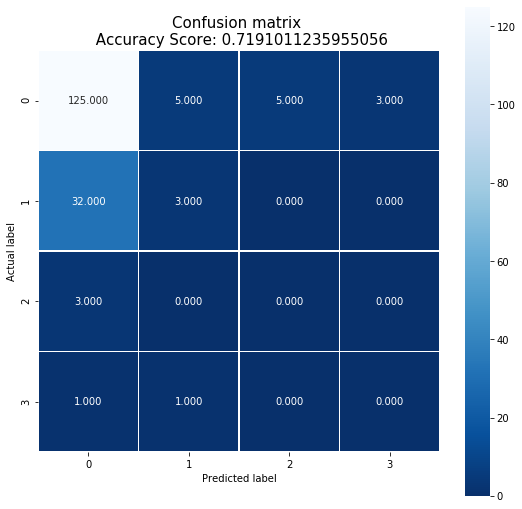

In [17]:
f.run_logisticRegression(previous, current, idx, ds3 = True, verbose = True, plot = True )